# KeplerGl Visual Rendering

The goal of this notebook is to visually render various generated/acquired datasets using Uber's open-source KeplerGL.

## To do:
- explain how the data has been created

## 0. Modules and auxilary functions

In [1]:
from keplergl import KeplerGl
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


In [2]:
print_kepler = True

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from fremontdropbox import get_dropbox_location
dbx = get_dropbox_location()
data_path = dbx + '/Private Structured data collection'

In [4]:
def to_gdf(path):
    gdf = gpd.GeoDataFrame.from_file(path)
    gdf = gdf.to_crs('epsg:4326')
    return gdf

In [5]:
# importing all the Kepler.gl configurations
import ast

def get_configs(config_file='visualization_config.txt'):
    configs = open(config_file, 'r')
    config_dict = ast.literal_eval(configs.read())
    configs.close()
    return config_dict
    
def write_configs(config_dict, key, config, config_file='visualization_config.txt'):
    config_dict[key] = config
    print(config_dict, file=open(config_file, 'w'))

dict_config = get_configs()

## 1. Project delimitation

Project delimitation has been created in ...

In [6]:
project_del_path = dbx + "/Private Structured data collection/Manual-made dataset (do not touch)/Network/Map/Project Delimitation/Project_delimitation.shp"
project_del = to_gdf(project_del_path)

if print_kepler:
    del_map = KeplerGl(height=600)
    del_map.add_data(data = project_del[project_del.Type == "Delimitation"], name="Project delimitation")
    del_map.add_data(data = project_del[project_del.Type == "Box"], name="Project box delimitation")
    del_map.save_to_html(file_name=data_path+"/Data processing/Kepler maps/delimitation.html")
    del_map
    

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
Map saved to /Users/theophile/Dropbox/Private Structured data collection/Data processing/Kepler maps/delimitation.html!


## 2. Network data

## To do: 
1. Get the different screenshot of the section characteristics (Theo)
2. Put the data in a CSV file (Theo)
3. Understand what is the meaning of node types and section function class
4. If possible render data about (Daniel M.):
    - traffic signal plans
    - master control plans
    - changes in network between 2013, 2017 and 2019
5. produce similar results with OSM directly (Ayush)

### 2.1 Map
#### Aimsun map

Aimsun map has been created in ...

In [7]:
# Get new demand
aimsun_complete = False
aimsun_path = dbx + '/Private Structured data collection/Aimsun/Inputs/'

detectors = to_gdf(aimsun_path +'detectors.shp')
meterings = to_gdf(aimsun_path +'meterings.shp')
nodes = to_gdf(aimsun_path +'nodes.shp')
sections = to_gdf(aimsun_path +'sections.shp')
sectionsGeo = to_gdf(aimsun_path +'sectionsGeo.shp')
turnings = to_gdf(aimsun_path +'turnings.shp')
if aimsun_complete:
    centroids = to_gdf(aimsun_path +'centroids.shp')
    centroid_connections = to_gdf(aimsun_path +'centroid_connections.shp')
#     polygons = to_gdf(aimsun_path +'polygons.shp')


#### The following cell is useful to better understand and render the network

In [8]:

# fremont_map = KeplerGl(height=600)
if print_kepler:
    node_map = KeplerGl(height=600)
    section_map = KeplerGl(height=600)
    speed_map = KeplerGl(height=600)
    capacity_map = KeplerGl(height=600)    
    func_type_map = KeplerGl(height=600)
        

node_type = np.sort(nodes.nodetype.unique())
print("--------Nodes-------")
print()
print("Total number of nodes: " + str(nodes['id'].count()))
print("Nodes type values: " + str(node_type))
for i in node_type:
    print("Number of nodes with type " + str(i) + ": " + str(nodes[nodes['nodetype'] == i]['id'].count()))
    if print_kepler:
        node_map.add_data(data = nodes[nodes['nodetype'] == i], name="Nodes type " + str(i))
    
print()
print("------Sections------")

print("Total number of section: " + str(sections['id'].count()))
print()
section_type = np.sort(sections.rd_type.unique())
print("Road type values: " + str(section_type))
print("175 = Motorway, 177 = Primary, 179 = Residential, 180 = Secondary, 182.0 = Tertiary, 184.0 = Trunk, 185.0 = Unclassified")
for i in section_type:
    print("Number of sections with type " + str(i) + ": " + str(sections[sections['rd_type'] == i]['id'].count()))
    if print_kepler:
        section_map.add_data(data = sections[sections['rd_type'] == i], name="Sections type " + str(i))
        
print()
section_speed = np.sort(sections.speed.unique())
print("Speed values: " + str(section_speed))
for i in section_speed:
    print("Number of sections with speed " + str(i) + " (km/h): " + str(sections[sections['speed'] == i]['id'].count()))
    if print_kepler:
        speed_map.add_data(data = sections[sections['speed'] == i], name="Sections speed " + str(i))
        
print()
section_cap = np.sort(sections.capacity.unique())
print("Capacity values: " + str(section_cap))
for i in section_cap:
    print("Number of sections with capacity " + str(i) + " (veh/h): " + str(sections[sections['capacity'] == i]['id'].count()))
    if print_kepler:
        capacity_map.add_data(data = sections[sections['capacity'] == i], name="Sections capacity " + str(i))
        
print()
section_func = np.sort(sections.func_class.unique())
print("Function class values: " + str(section_func))
for i in section_func:
    print("Number of sections with function class " + str(i) + ": " + str(sections[sections['func_class'] == i]['id'].count()))
    if print_kepler:
        func_type_map.add_data(data = sections[sections['func_class'] == i], name="Sections function class " + str(i))
        
# fremont_map
if print_kepler:
    node_map.save_to_html(file_name=data_path+"/Data processing/Kepler maps/Network/Map/nodes_to_check.html")
    section_map.save_to_html(file_name=data_path+"/Data processing/Kepler maps/Network/Map/Sections/types.html")
    speed_map.save_to_html(file_name=data_path+"/Data processing/Kepler maps/Network/Map/Sections/speed.html")
    capacity_map.save_to_html(file_name=data_path+"/Data processing/Kepler maps/Network/Map/Sections/capacity.html")
    func_type_map.save_to_html(file_name=data_path+"/Data processing/Kepler maps/Network/Map/Sections/funct_type.html")
    

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
--------Nodes-------

Total number of nodes: 2013
Nodes type values: [0. 1. 2. 3.]
Number of nodes with type 0.0: 585
Number of nodes with type 1.0: 1259
Number of nodes with type 2.0: 35
Number of nodes with type 3.0: 134

------Sections------
Total number of section: 5626

Road type values: [175. 177. 179. 180. 182. 184. 185.]
175 = Motorway, 177 = Primary, 179 = Residential, 180 = Secondary, 182.0 = Tertiary, 184.0 = Trunk, 185.0 = Unclassified
Number of sections with type 175.0: 111
Number of sections

In [9]:
if print_kepler:
    aimsun_map = KeplerGl(height=600)
    aimsun_map.add_data(data = detectors, name="Detectors")
    aimsun_map.add_data(data = meterings, name="meterings")
    aimsun_map.add_data(data = nodes, name="nodes")
    aimsun_map.add_data(data = sections, name="sections")
    aimsun_map.add_data(data = sectionsGeo, name="sectionsGeo")
    aimsun_map.add_data(data = turnings, name="turnings")
    if aimsun_complete:
        aimsun_map.add_data(data = centroids, name="centroids")
        aimsun_map.add_data(data = centroid_connections, name="centroid_connections")
#         fremont_map.add_data(data = polygons, name="polygons")
    aimsun_map.save_to_html(file_name=data_path+"/Data processing/Kepler maps/Network/aimsun_data.html")

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
Map saved to /Users/theophile/Dropbox/Private Structured data collection/Data processing/Kepler maps/Network/aimsun_data.html!


#### Aimsun centroids and centroids connections

In [10]:
if print_kepler and aimsun_complete:
    centroid_map = KeplerGl(height=600, config=dict_config['centroid_config'])
    centroid_map.add_data(data = centroids[centroids['name'].str.contains('ext')], name="External centroids")
    centroid_map.add_data(data = centroids[centroids['name'].str.contains('int')], name="Internal centroids")
    centroid_map.add_data(data = centroid_connections, name="Centroid connections")
    centroid_map.add_data(data = centroid_connections[centroid_connections['direction'] == 'from'], name="Outgoing centroid connections")
    centroid_map.add_data(data = centroid_connections[centroid_connections['direction'] == 'to'], name="Incoming centroid connections")
    centroid_map.add_data(data = sections, name="sections")
    centroid_map.save_to_html(file_name=data_path+"/Data processing/Kepler maps/Network/Map/centroids.html")

#### Aimsun road section

In [11]:
if print_kepler:
    road_section_map = KeplerGl(height=600, config=dict_config['road_type_config'])

    road_section_map.add_data(data = sections[sections['rd_type'] == 175.0], name="Motorway")
    road_section_map.add_data(data = sections[sections['rd_type'] == 177.0], name="Primary")
    road_section_map.add_data(data = sections[sections['rd_type'] == 179.0], name="Residential")
    road_section_map.add_data(data = sections[sections['rd_type'] == 180.0], name="Secondary")
    road_section_map.add_data(data = sections[sections['rd_type'] == 182.0], name="Tertiary")
    road_section_map.add_data(data = sections[sections['rd_type'] == 184.0], name="Trunk")
    road_section_map.add_data(data = sections[sections['rd_type'] == 185.0], name="Unclassified")
    road_section_map.save_to_html(file_name=data_path+"/Data processing/Kepler maps/Network/Map/sections.html")


User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
Map saved to /Users/theophile/Dropbox/Private Structured data collection/Data processing/Kepler maps/Network/Map/sections.html!


In [12]:
# road_type_config = road_section_map.config
# file = open("visualization_config.txt", 'w')
# file.write("{'road_type_config': " + str(road_type_config))
# file.write("}")
# file.close()

### 2.2 Infrastructure
#### Traffic signals and stop signs

Traffic signals and stop signs have been created in ...

## To do: get infrastructure data from OSM

In [13]:
def to_gdf_csv(path):
# https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html#from-wkt-format
    df = pd.read_csv(path)
    gdf = gpd.GeoDataFrame(
        df, crs='epsg:4326', geometry=gpd.points_from_xy(df.x, df.y))
    return gdf

In [14]:
network_infra_path = data_path + "/Manual-made dataset (do not touch)/Network/Infrastructure/"

stop_signs = to_gdf_csv(network_infra_path + "Stop signs location/Stop_Signs.csv")
traffic_lights = to_gdf_csv(network_infra_path + "Traffic lights location/Traffic_Lights.csv")

In [15]:
if print_kepler:
    intersections = KeplerGl(height=600)
    intersections.add_data(data = stop_signs, name="Stop signs")
    intersections.add_data(data = traffic_lights, name="Traffic lights")
    intersections.save_to_html(file_name=data_path+"/Data processing/Kepler maps/Network/Infrastructure/signs_and_lights.html")


User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
Map saved to /Users/theophile/Dropbox/Private Structured data collection/Data processing/Kepler maps/Network/Infrastructure/signs_and_lights.html!


## To do: add the data in the following cell to the csv file for the Aimsun specs

In [16]:
print("Number of stop signs: " + str(stop_signs.__OBJECTID.count()))
print("Number of traffic lights: " + str(traffic_lights.__OBJECTID.count()))


Number of stop signs: 313
Number of traffic lights: 123


## 3. Demand data

### 3.1 OD matrix demand

#### Raw demand:
- SFCTA demand data
- Fremont neighborhood

In [17]:
import datetime

def get_sfcta_dataframe(int_int_path, int_ext_path, ext_int_path):
    int_int_trips = pd.read_csv(int_int_path)
    int_ext_trips = pd.read_csv(int_ext_path)
    ext_int_trips = pd.read_csv(ext_int_path)

    internal_trips = pd.DataFrame.merge(int_int_trips, int_ext_trips, 'outer')
    internal_trips = pd.DataFrame.merge(internal_trips, ext_int_trips, 'outer')
    internal_trips['start_time'] = internal_trips['start_time'].apply(lambda x: pd.Timestamp(x))
    return internal_trips

def shift_time(demand_df, column):
    demand_df[column] += pd.to_timedelta(-8, unit='h')
    demand_df[column] = demand_df[column].apply(lambda x: x.time())
    
def get_demand_between_time(demand_df, begin_time, end_time):
    return demand_df[(demand_df.start_time >= begin_time) & (demand_df.start_time <= end_time)]
    
def cluster_demand_15min(df):
    demand_df = df.copy()
    demand_df['start_time'] = demand_df['start_time'].apply(lambda x: str(x.replace(minute=int(x.minute/15)*15,second = 0)))
    return demand_df.groupby(['start_time']).size().reset_index(name='counts')

SFCTA_path = data_path+ '/Data processing/Raw/Demand/OD demand/SFCTA demand data/'
int_int_path = SFCTA_path + "internal_fremont_legs.csv"
int_ext_path = SFCTA_path + "starting_fremont_legs.csv"
ext_int_path = SFCTA_path + "ending_fremont_legs.csv"

print("Loading SFCTA trips...")
internal_trips = get_sfcta_dataframe(int_int_path, int_ext_path, ext_int_path)
print("Shifting time...")
shift_time(internal_trips, 'start_time')
print("Get afternoon demand")
begin_time = datetime.time(14, 0, 0)
end_time = datetime.time(20, 0, 0)
afternoon_demand = get_demand_between_time(internal_trips, begin_time, end_time)
print("Clustering...")
clustered_internal_trips = cluster_demand_15min(internal_trips)
clustered_afternoon_trips = cluster_demand_15min(afternoon_demand)
print('Done')

Loading SFCTA trips...
Shifting time...
Get afternoon demand
Clustering...
Done


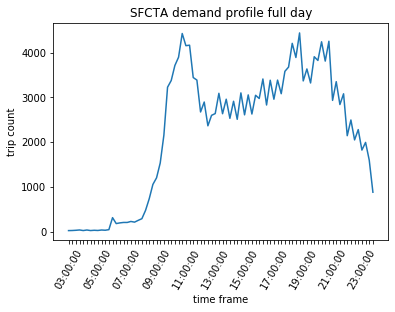

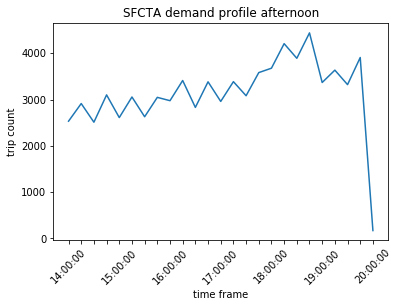

In [18]:
def print_demand_profile(df, every_nth, rot, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(df.start_time, df.counts)
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
    plt.xticks(rotation=rot)
    plt.title(title)
    plt.xlabel("time frame")
    plt.ylabel("trip count")
    plt.show()
    
print_demand_profile(clustered_internal_trips, 8, 60, "SFCTA demand profile full day")
print_demand_profile(clustered_afternoon_trips, 4, 45, "SFCTA demand profile afternoon")


In [19]:
from shapely.geometry import Point, LineString

def fxy(start_lat, start_lng, end_lat, end_lng):
    return LineString([(start_lng, start_lat), (end_lng, end_lat)])

begin_time = datetime.time(16, 0, 0)
end_time = datetime.time(16, 2, 0)

if print_kepler:
    afternoon_demand['geometry'] = afternoon_demand.apply(lambda x: fxy(x['start_node_lat'], x['start_node_lng'], x['end_node_lat'], x['end_node_lng']), axis=1)
    afternoon_demand_gpd = gpd.GeoDataFrame(afternoon_demand, crs='epsg:4326', geometry = afternoon_demand.geometry)
    demand_in_time = afternoon_demand_gpd[(afternoon_demand_gpd.start_time >= begin_time) & (afternoon_demand_gpd.start_time <= end_time)]

    demand_map = KeplerGl(height=600)
    demand_map.add_data(data = demand_in_time[['leg_id','geometry']], name="Demand")
    demand_map.save_to_html(file_name=data_path+"/Data processing/Kepler maps/Demand/SFCTA_1600_1602.html")
    

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
Map saved to /Users/theophile/Dropbox/Private Structured data collection/Data processing/Kepler maps/Demand/SFCTA_1600_1602.html!


/Users/theophile/miniconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


## To do:
- do some check about the data using the processed data (especially demand profile and demand not assigned)

## 2. Demand data

## Transportation Analysis Zones

## To do Ayush: 
1. Put in red external demand. Put in blue internal demand. Maybe cluster some internal TAZs together to get a better rendering of the demand data. Set the width of the lines to be a function of the lines. If possible get some legend about how width is related to count.

### To do: we should merge some internal centroids for visualization purposes. 
Maybe for visualization we can have only 30 internal centroids (just merged some together temporaly for the visualization).
Then for the width, the easiest thing might be to create some batches for the data. Something like:
`fremont_map.add_data(data = internal_demand[internal_demand['counts'] < 5], name="Internal Demand < 5 veh/15 min")`
`fremont_map.add_data(data = internal_demand[(internal_demand['counts'] >= 5) & (internal_demand['counts'] < 20)], name="Internal Demand in [5,20) veh/h")")`
`...`

Then serialize a config where the width of the line depends on the counts and color are: red for external-external, dark blue for internal-external, light blue for internal-internal.

In [20]:
from shapely.geometry import Point, LineString

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

path_taz = data_path + "/Data processing/Auxiliary files/Demand/OD demand/TAZ"
internal_taz = to_gdf(path_taz + "/Internal_TAZ.shp")
# external_taz = to_gdf(path_taz + "/External_TAZ.shp")
external_centroids = to_gdf(path_taz + "/External_centroids.shp")

# Get gravity centers for all TAZs (internal and external)
centroid_gravity = {}
for i in range(len(internal_taz['geometry'])):
    centroid_gravity[internal_taz['CentroidID'][i]] = internal_taz['geometry'][i].centroid
for i in range(len(external_centroids['geometry'])):
    centroid_gravity[external_centroids['CentroidID'][i]] = external_centroids['geometry'][i]

od_demand_path = data_path + "/Data processing/Temporary exports to be copied to processed data/Demand/OD demand/" 
internal_od = pd.read_csv(od_demand_path + "Internal OD grouped by timestamp.csv")
external_od = pd.read_csv(od_demand_path + "External OD grouped by timestamp.csv")

# Remove centroids with no demand
external_od = external_od[external_od["counts"] != 0]
internal_od = internal_od[internal_od["counts"] != 0]

# Fix analysis timestep at 6 PM
internal_od_6_pm = internal_od[internal_od["dt_15"]=="18:00:00"]
external_od_6_pm = external_od[external_od["dt_15"]=="18:0"]

internal_od_6_pm = internal_od_6_pm.reset_index()
external_od_6_pm = external_od_6_pm.reset_index()

external_demand = gpd.GeoDataFrame(columns=['CentroidID_O', 'CentroidID_D', "counts", 'geometry'])
for i in range(len(external_od_6_pm['CentroidID_O'])):
    origin_id = external_od_6_pm['CentroidID_O'][i]
    dest_id = external_od_6_pm['CentroidID_D'][i]
    demand = external_od_6_pm['counts'][i]
    external_demand.loc[i] = [origin_id, dest_id, demand, LineString([centroid_gravity[origin_id], centroid_gravity[dest_id]])]

internal_demand = gpd.GeoDataFrame(columns=['CentroidID_O', 'CentroidID_D', "counts", 'geometry'])
int_ext_demand = gpd.GeoDataFrame(columns=['CentroidID_O', 'CentroidID_D', "counts", 'geometry'])
for i in range(len(internal_od_6_pm['CentroidID_O'])):
    origin_id = internal_od_6_pm['CentroidID_O'][i]
    dest_id = internal_od_6_pm['CentroidID_D'][i]
    demand = internal_od_6_pm['counts'][i]
    if origin_id in centroid_gravity and dest_id in centroid_gravity:
        if "ext" not in origin_id and "ext" not in dest_id:
            internal_demand.loc[i] = [origin_id, dest_id, demand, LineString([centroid_gravity[origin_id], centroid_gravity[dest_id]])]
        else:
                int_ext_demand.loc[i] = [origin_id, dest_id, demand, LineString([centroid_gravity[origin_id], centroid_gravity[dest_id]])]

print("Number of Vehicles Analyzed at 6 PM (Internal):", internal_od_6_pm.counts.sum())
print("Number of Vehicles Analyzed at 6 PM (External):", external_od_6_pm.counts.sum())
print("Number of Vehicles Analyzed at 6 PM (Total):", internal_od_6_pm.counts.sum() + external_od_6_pm.counts.sum())

if print_kepler:
    demand_6_pm_map = KeplerGl(height=600, config=dict_config["OD Demand"])
    demand_6_pm_map.add_data(data = external_centroids, name="External Centroids")

    int_batches = {"Internal Demand":[(0, 2), (2, 3), (3, 4), (4, 5), (5, float('inf'))]}
    int_ext_batches = {"Internal/External Demand":[(0, 2), (5, 10), (10, 15), (15, float('inf'))]}
    ext_batches = {"External Demand":[(0, 10), (10, 50), (50, 250), (250, float('inf'))]}
    dem_map = {"Internal Demand":internal_demand, "Internal/External Demand":int_ext_demand, "External Demand":external_demand}

    for batch_list in [int_batches, int_ext_batches, ext_batches]:
        for b_name, batches in batch_list.items():
            for batch in batches:
                demand_6_pm_map.add_data(data = dem_map[b_name][(dem_map[b_name]['counts'] >= batch[0])\
                                            & (dem_map[b_name]['counts'] < batch[1])],\
                                     name="{} in [{},{}) veh/15 min".format(b_name, batch[0], batch[1]))

    demand_6_pm_map.add_data(data = internal_taz, name="Internal TAZs")

    demand_6_pm_map.save_to_html(file_name=data_path+"/Data processing/Kepler maps/Demand/6pm_demand_batches_map.html")
    

Number of Vehicles Analyzed at 6 PM (Internal): 3642
Number of Vehicles Analyzed at 6 PM (External): 1263
Number of Vehicles Analyzed at 6 PM (Total): 4905
User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
Map saved to /Users/theophile/Dropbox/Private Structured data collection/Data processing/Kepler maps/Demand/6pm_demand_batches_map.html!


In [21]:
# Serializing KeplerGl config for 7_6pm_demand_batches_map.html
'''
write_configs(dict_config, "OD Demand", fremont_map.config)
dict_config = get_configs()
'''

'\nwrite_configs(dict_config, "OD Demand", fremont_map.config)\ndict_config = get_configs()\n'

## External TAZs

In [22]:
from shapely.geometry import Point, LineString

if print_kepler:
    path_taz = data_path + "/Manual-made dataset (do not touch)/Demand/OD demand/External TAZ/External Centroid zones/"
    external_taz = to_gdf(path_taz + "/ExternalCentroidZones.shp")
    external_taz_map = KeplerGl(height=600)
    external_taz_map.add_data(data = external_taz, name="External TAZs")
    external_taz_map.save_to_html(file_name=data_path+"/Data processing/Kepler maps/Demand/External_TAZs.html")
    
    

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
Map saved to /Users/theophile/Dropbox/Private Structured data collection/Data processing/Kepler maps/Demand/External_TAZs.html!


## The following is to do later

## Open Street Map

In [23]:
import ogr

driver=ogr.GetDriverByName('OSM')
path_osm = data_path + "/Raw data (do not touch)/Network/Map/OSM/"


data = driver.Open(path_osm + 'map1111.osm')

for i in range(data.GetLayerCount()):
    print(data.GetLayerByIndex(i).GetName())
    
layer = data.GetLayer('points')

features=[x for x in layer]
print(len(features))

data_list=[]
i = 0
for feature in features:
    i = i + 1
    data=feature.ExportToJson(as_object=True)
    coords=data['geometry']['coordinates']
    shapely_geo=Point(coords[0],coords[1])
    name=data['properties']['name']
    highway=data['properties']['highway']
    print(highway)
    other_tags=data['properties']['other_tags']
    if other_tags and 'amenity' in other_tags:
        feat=[x for x in other_tags.split(',') if 'amenity' in x][0]
        amenity=feat[feat.rfind('>')+2:feat.rfind('"')]
    else:
        amenity=None
    data_list.append([name,highway,amenity,shapely_geo])
    if i > 20:
        break
# gdf=gpd.GeoDataFrame(data_list,columns=['Name','Highway','Amenity','geometry'],crs={'init': 'epsg:4326'}).to_crs(epsg=3310)

points
lines
multilinestrings
multipolygons
other_relations
1885
motorway_junction
motorway_junction
crossing
None
None
None
None
None
None
None
None
None
None
motorway_junction
traffic_signals
turning_circle
traffic_signals
motorway_junction
turning_circle
turning_circle
turning_circle
